In [1]:
import sys
sys.path.insert(0, '../tools')

%load_ext prov_magics
import provn
import versioned_prov

# Versioned-PROV

## Names, literals, and constants

In [ ]:
%%provn -o ../explicit_versioned/names -e png svg pdf provn
entity(n1, [value="1", type="literal", label="1"])
entity(n1_v1, [value="2018-02-22T16:00:00", type="Version"])
hadVersion(n1, n1_v1)

entity(a1, [value="'a'", type="literal", label="'a'"])
entity(a1_v1, [value="2018-02-22T16:00:01", type="Version"])
hadVersion(a1, a1_v1)

entity(a2, [value="b'a'", type="literal", label="b'a'"])
entity(a2_v1, [value="2018-02-22T16:00:02", type="Version"])
hadVersion(a2, a2_v1)

entity(true1, [value="True", type="constant", label="True"])
entity(true1_v1, [value="2018-02-22T16:00:03", type="Version"])
hadVersion(true1, true1_v1)

entity(int1, [value="<class int>", type="name", label="int"])
entity(int1_v1, [value="2018-02-22T16:00:04", type="Version"])
hadVersion(int1, int1_v1)

entity(ellipsis1, [value="Ellipsis", type="constant", label="..."])
entity(ellipsis1_v1, [value="2018-02-22T16:00:05", type="Version"])
hadVersion(ellipsis1, ellipsis1_v1)

## Assignment

In [ ]:
%%provn -o ../explicit_versioned/assign -e png svg pdf provn
entity(n10000, [value="10000", type="literal", label="10000"])
entity(n10000_v1, [value="T1", type="Version"])
hadVersion(n10000, n10000_v1)

entity(m1, [value="m", type="name"])

activity(assign1, [type="assign"])
used(u1; assign1, n10000, -)
wasGeneratedBy(g1; m1, assign1, -)
referenceDerivedFrom(m1, n10000, assign1, g1, u1, T2)

## Operation

In [ ]:
%%provn -o ../explicit_versioned/operation -e png svg pdf provn
// previous
entity(n10000, [value="10000", type="literal", label="10000"])
entity(n10000_v1, [value="T1", type="Version"])
hadVersion(n10000, n10000_v1)
entity(m1, [value="10000", type="name"])
referenceDerivedFrom(m1, n10000, -, -, -, T2)

// new
entity(n1, [value="1", type="literal", label="1"])
entity(n1_v1, [value="T3", type="Version"])
hadVersion(n1, n1_v1)

entity(sum1, [value="10001", type="operation", label="m + 1"])
entity(sum1_v1, [value="T4", type="Version"])
hadVersion(sum1, sum1_v1)

activity(add1, [type="operation"])
used(u2; add1, m1, -)
used(u3; add1, n1, -)
wasGeneratedBy(g2; sum1, add1, -)
wasDerivedFrom(sum1, m1, add1, g2, u2)
wasDerivedFrom(sum1, n1, add1, g3, u3)

## List definition

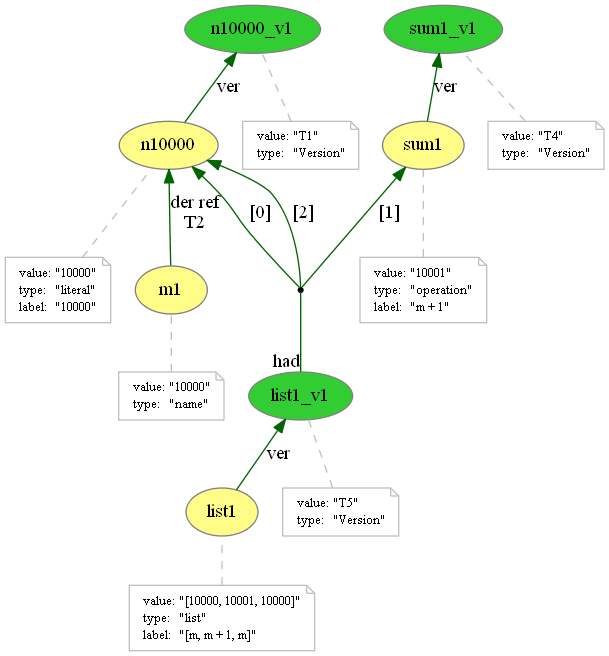

In [2]:
%%provn -o ../explicit_versioned/list -e png svg pdf provn
// previous
entity(n10000, [value="10000", type="literal", label="10000"])
entity(n10000_v1, [value="T1", type="Version"])
hadVersion(n10000, n10000_v1)
entity(m1, [value="10000", type="name"])
referenceDerivedFrom(m1, n10000, -, -, -, T2)

entity(sum1, [value="10001", type="operation", label="m + 1"])
entity(sum1_v1, [value="T4", type="Version"])
hadVersion(sum1, sum1_v1)

// new
entity(list1, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]"])
entity(list1_v1, [value="T5", type="Version"])
hadVersion(list1, list1_v1)
hadItems(list1_v1, {("0", n10000), ("1", sum1), ("2", n10000)})

## Assignment of list definition

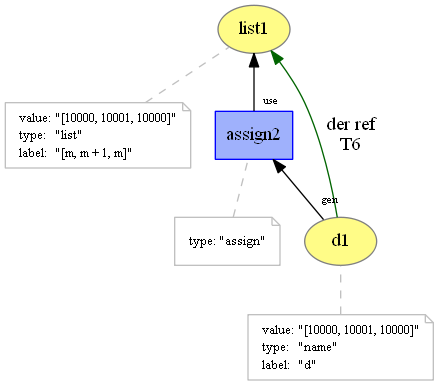

In [3]:
%%provn -o ../explicit_versioned/list_assign -e png svg pdf provn
// previous
entity(list1, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]"])

// new entities
entity(d1, [value="[10000, 10001, 10000]", type="name", label="d"])

activity(assign2, [type="assign"])
used(u7; assign2, list1, -)
wasGeneratedBy(g7; d1, assign2, -)
referenceDerivedFrom(d1, list1, assign2, g7, u7, T6)

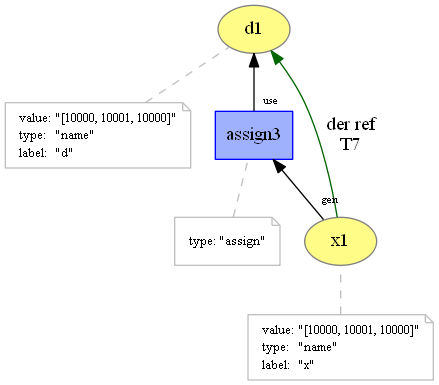

In [4]:
%%provn -o ../explicit_versioned/list_assign2 -e png svg pdf provn
// old entities from previous figure
entity(d1, [value="[10000, 10001, 10000]", type="name", label="d"])

// new entities
entity(x1, [value="[10000, 10001, 10000]", type="name", label="x"])

activity(assign3, [type="assign"])
used(u8; assign3, d1, -)
wasGeneratedBy(g8; x1, assign3, -)
referenceDerivedFrom(x1, d1, assign3, g8, u8, T7)

## Function call

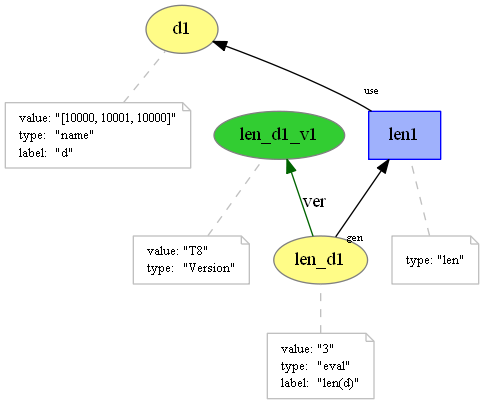

In [5]:
%%provn -o ../explicit_versioned/call -e png svg pdf provn
// previous
entity(d1, [value="[10000, 10001, 10000]", type="name", label="d"])

// new
entity(len_d1, [value="3", type="eval", label="len(d)"])
entity(len_d1_v1, [value="T8", type="Version"])
hadVersion(len_d1, len_d1_v1)

activity(len1, [type="len"])
used(len1, d1, -)
wasGeneratedBy(len_d1, len1, -)

## Access to part of structure

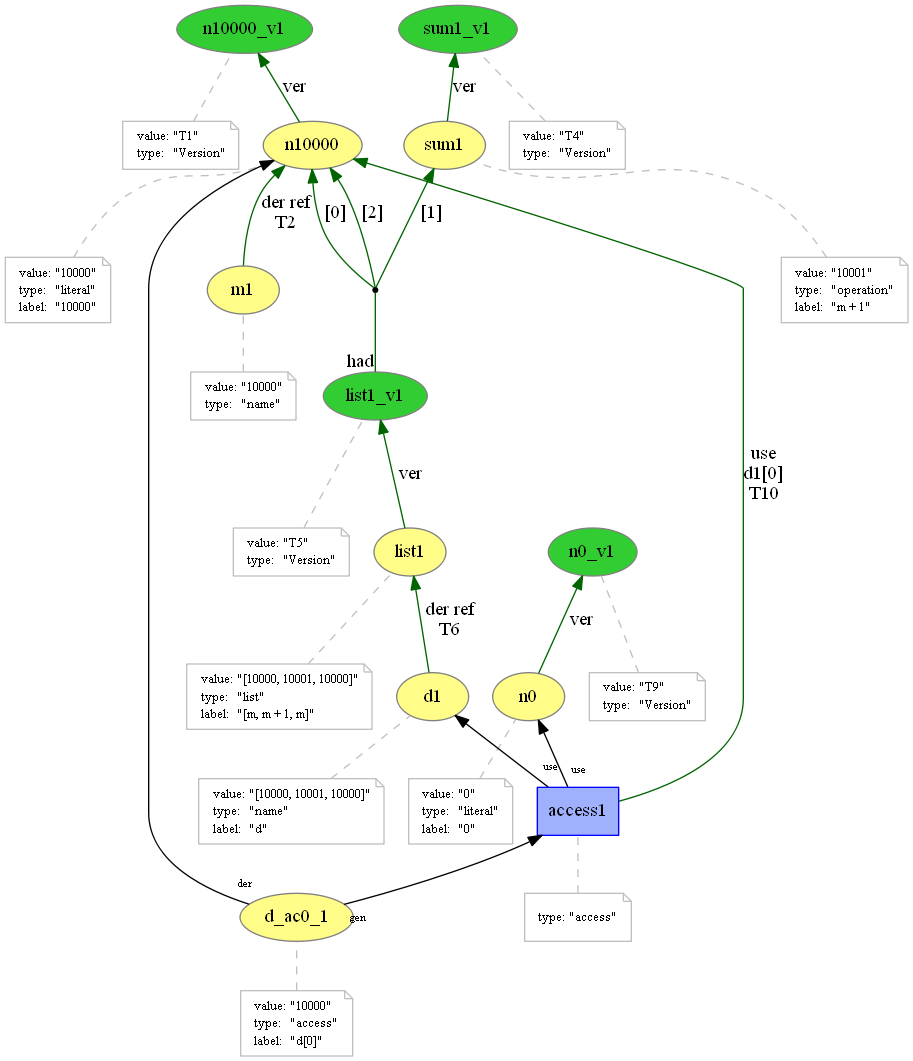

In [6]:
%%provn -o ../explicit_versioned/access -e png svg pdf provn
//previous
entity(n10000, [value="10000", type="literal", label="10000"])
entity(n10000_v1, [value="T1", type="Version"])
hadVersion(n10000, n10000_v1)
entity(m1, [value="10000", type="name"])
referenceDerivedFrom(m1, n10000, -, -, -, T2)

entity(sum1, [value="10001", type="operation", label="m + 1"])
entity(sum1_v1, [value="T4", type="Version"])
hadVersion(sum1, sum1_v1)

entity(list1, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]"])
entity(list1_v1, [value="T5", type="Version"])
hadVersion(list1, list1_v1)
hadItems(list1_v1, {("0", n10000), ("1", sum1), ("2", n10000)})

entity(d1, [value="[10000, 10001, 10000]", type="name", label="d"])
referenceDerivedFrom(d1, list1, -, -, -, T6)


//access
entity(n0, [value="0", type="literal", label="0"])
entity(n0_v1, [value="T9", type="Version"])
hadVersion(n0, n0_v1)

entity(d_ac0_1, [value="10000", type="access", label="d[0]"])


activity(access1, [type="access"])
used(access1, d1, -)
used(access1, n0, -)
usedPart(u9; access1, n10000, "0", d1, T10)
wasGeneratedBy(g9; d_ac0_1, access1, -)
wasDerivedFrom(d_ac0_1, n10000, access1, g9, u9)

## Assignment to part of structure

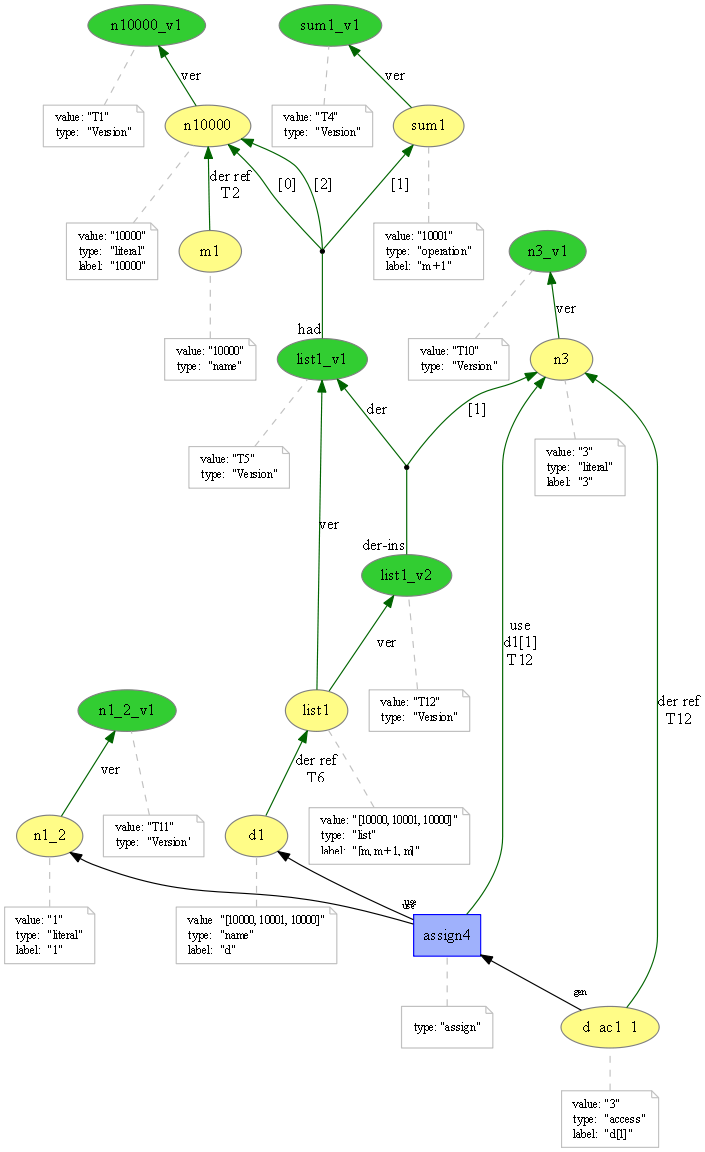

In [13]:
%%provn -o ../explicit_versioned/part_assign -e png svg pdf provn
//previous
entity(n10000, [value="10000", type="literal", label="10000"])
entity(n10000_v1, [value="T1", type="Version"])
hadVersion(n10000, n10000_v1)
entity(m1, [value="10000", type="name"])
referenceDerivedFrom(m1, n10000, -, -, -, T2)

entity(sum1, [value="10001", type="operation", label="m + 1"])
entity(sum1_v1, [value="T4", type="Version"])
hadVersion(sum1, sum1_v1)

entity(list1, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]"])
entity(list1_v1, [value="T5", type="Version"])
hadVersion(list1, list1_v1)
hadItems(list1_v1, {("0", n10000), ("1", sum1), ("2", n10000)})

entity(d1, [value="[10000, 10001, 10000]", type="name", label="d"])
referenceDerivedFrom(d1, list1, -, -, -, T6)


//part assign
entity(n3, [value="3", type="literal", label="3"])
entity(n3_v1, [value="T10", type="Version"])
hadVersion(n3, n3_v1)

entity(n1_2, [value="1", type="literal", label="1"])
entity(n1_2_v1, [value="T11", type="Version"])
hadVersion(n1_2, n1_2_v1)

entity(d_ac1_1, [value="3", type="access", label="d[1]"])

entity(list1_v2, [value="T12", type="Version"])
derivedByInsertionFrom(list1_v2, list1_v1, {("1", n3)})
hadVersion(list1, list1_v2)

activity(assign4, [type="assign"])
used(assign4, d1, -)
used(assign4, n1_2, -)
usedPart(u10; assign4, n3, "1", d1, T12)
wasGeneratedBy(g10; d_ac1_1, assign4, -)
referenceDerivedFrom(d_ac1_1, n3, assign4, g10, u10, T12)

## Full

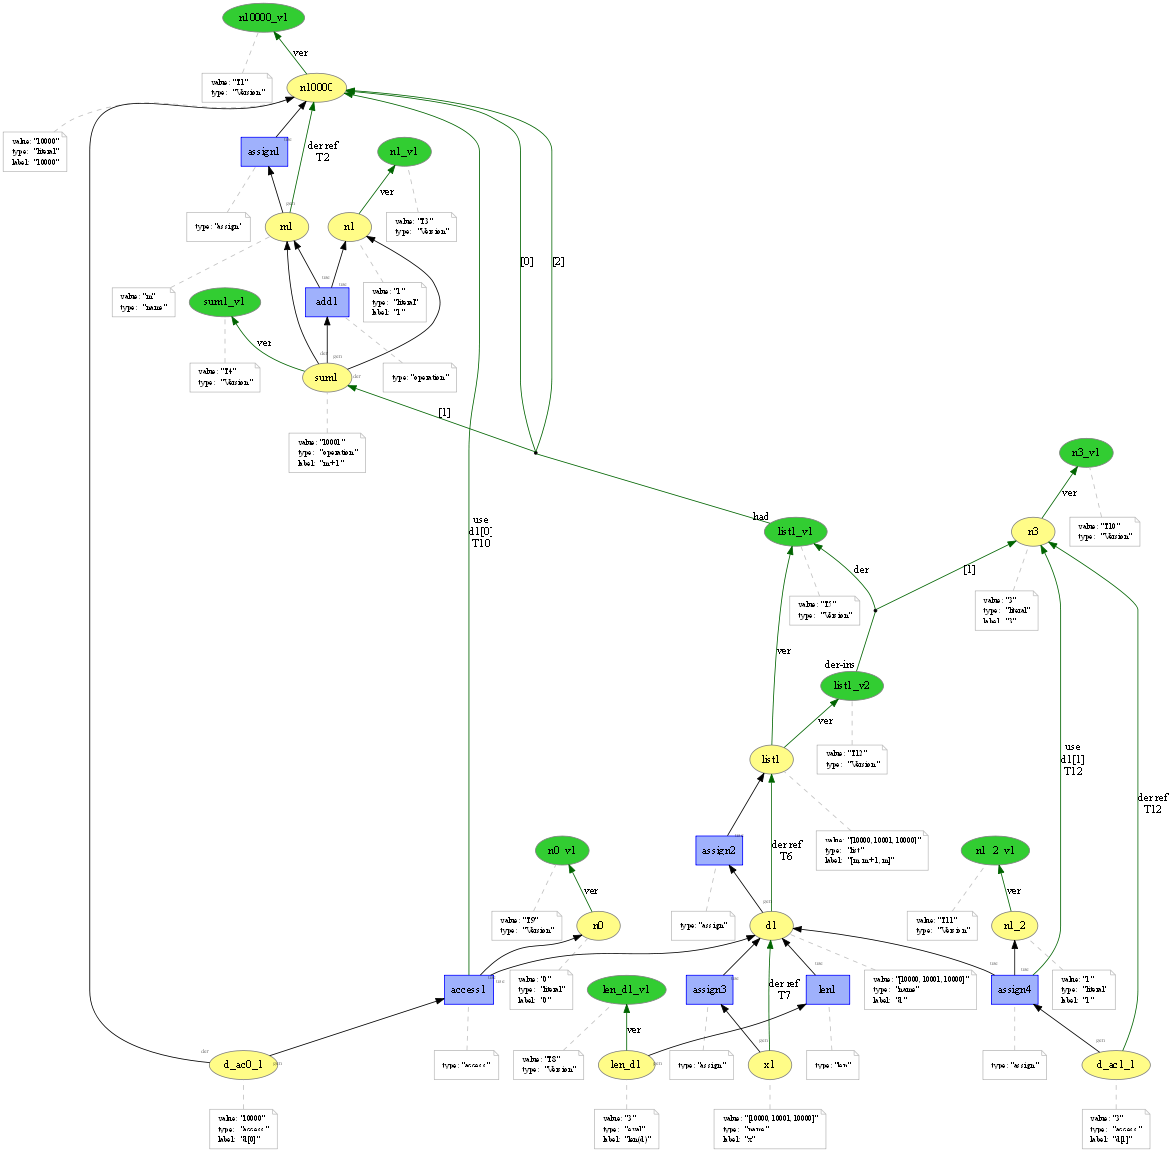

In [14]:
%%provn -o ../mutable_prov/full -e png svg pdf provn
// assignment
entity(n10000, [value="10000", type="literal", label="10000"])
entity(n10000_v1, [value="T1", type="Version"])
hadVersion(n10000, n10000_v1)

entity(m1, [value="m", type="name"])

activity(assign1, [type="assign"])
used(u1; assign1, n10000, -)
wasGeneratedBy(g1; m1, assign1, -)
referenceDerivedFrom(m1, n10000, assign1, g1, u1, T2)

// operation
entity(n1, [value="1", type="literal", label="1"])
entity(n1_v1, [value="T3", type="Version"])
hadVersion(n1, n1_v1)

entity(sum1, [value="10001", type="operation", label="m + 1"])
entity(sum1_v1, [value="T4", type="Version"])
hadVersion(sum1, sum1_v1)

activity(add1, [type="operation"])
used(u2; add1, m1, -)
used(u3; add1, n1, -)
wasGeneratedBy(g2; sum1, add1, -)
wasDerivedFrom(sum1, m1, add1, g2, u2)
wasDerivedFrom(sum1, n1, add1, g3, u3)

// list def
entity(list1, [value="[10000, 10001, 10000]", type="list", label="[m, m + 1, m]"])
entity(list1_v1, [value="T5", type="Version"])
hadVersion(list1, list1_v1)
hadItems(list1_v1, {("0", n10000), ("1", sum1), ("2", n10000)})

// list assign
entity(d1, [value="[10000, 10001, 10000]", type="name", label="d"])

activity(assign2, [type="assign"])
used(u7; assign2, list1, -)
wasGeneratedBy(g7; d1, assign2, -)
referenceDerivedFrom(d1, list1, assign2, g7, u7, T6)

// list assign x
entity(x1, [value="[10000, 10001, 10000]", type="name", label="x"])

activity(assign3, [type="assign"])
used(u8; assign3, d1, -)
wasGeneratedBy(g8; x1, assign3, -)
referenceDerivedFrom(x1, d1, assign3, g8, u8, T7)

// call
entity(len_d1, [value="3", type="eval", label="len(d)"])
entity(len_d1_v1, [value="T8", type="Version"])
hadVersion(len_d1, len_d1_v1)

activity(len1, [type="len"])
used(len1, d1, -)
wasGeneratedBy(len_d1, len1, -)

// part access
entity(n0, [value="0", type="literal", label="0"])
entity(n0_v1, [value="T9", type="Version"])
hadVersion(n0, n0_v1)

entity(d_ac0_1, [value="10000", type="access", label="d[0]"])

activity(access1, [type="access"])
used(access1, d1, -)
used(access1, n0, -)
usedPart(u9; access1, n10000, "0", d1, T10)
wasGeneratedBy(g9; d_ac0_1, access1, -)
wasDerivedFrom(d_ac0_1, n10000, access1, g9, u9)

// part assign
entity(n3, [value="3", type="literal", label="3"])
entity(n3_v1, [value="T10", type="Version"])
hadVersion(n3, n3_v1)

entity(n1_2, [value="1", type="literal", label="1"])
entity(n1_2_v1, [value="T11", type="Version"])
hadVersion(n1_2, n1_2_v1)

entity(d_ac1_1, [value="3", type="access", label="d[1]"])

entity(list1_v2, [value="T12", type="Version"])
derivedByInsertionFrom(list1_v2, list1_v1, {("1", n3)})
hadVersion(list1, list1_v2)

activity(assign4, [type="assign"])
used(assign4, d1, -)
used(assign4, n1_2, -)
usedPart(u10; assign4, n3, "1", d1, T12)
wasGeneratedBy(g10; d_ac1_1, assign4, -)
referenceDerivedFrom(d_ac1_1, n3, assign4, g10, u10, T12)